# Лабораторная работа 1. Линейная регрессия. Нормальное уравнение

Если для оценки качества в регресии используется среднеквадратичная ошибка (*mean squared error, MSE*), то ошибка на одном примере (*функция потерь*) будет определяться выражением:

$$L(y,a)=(a-y)^2$$

а суммарная ошибка (*функционал ошибки*):

$$MSE(a,X)=\frac1{l}\sum_{i=1}^lL(y_i,a(\overrightarrow{x_i}))=\frac1{l}\sum_{i=1}^l(a(\overrightarrow{x_i})-y_i)^2$$

В случае линейной регресии:

$$a(\overrightarrow{x_i})=\langle \overrightarrow{w},\overrightarrow{x_i}\rangle$$

Задача оптимизации:

$$\frac1{l}\sum_{i=1}^l (\langle \overrightarrow{w},\overrightarrow{x_i}\rangle-y_i)^2\to \min_{\overrightarrow{w}}$$

Тогда, продифференцировав функционал ошибки по $\overrightarrow{w}$, приравняв его нулю и решив полученное уравнение, получим следующее выражение для оптимального вектора весов, которое называется *нормальным уравнением*:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}(X^T\overrightarrow{y}).$$

**Задание 1. Пример из лекций**

Напишите функцию ``get_weight``, которая находит вектор весов на основе нормального уравнения.

Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

Проверьте работу функции на простом примере из лекций:

$$x_1=2, x_2=3, x_3=5$$

$$y_1=1, y_2=3, y_3=4$$

Имейте в виду, что $X$ – это матрица (в данном примере состоящая из одного столбца).

Нарисуйте исходные данные и полученную линию регресии при помощи ``matplotlib``: для рисования точек используйте ``plt.scatter``, для рисования линии – ``plt.plot``.

In [75]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

w =  [-0.42857143  0.92857143]
y_predict =  [1.42857143 2.35714286 4.21428571]


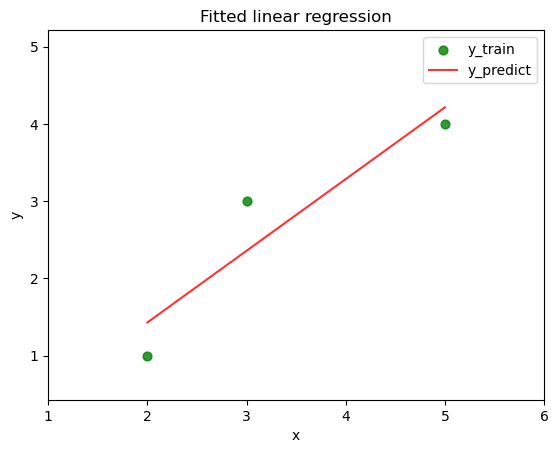

In [76]:
def lin_reg(X, w):
    X = np.array([np.ones(X.shape[0]), X]).T
    y_predict = np.dot(w, X.T)
    return y_predict
    
def get_weight(X, y):
    
    # Ваш код здесь
    X = np.array([np.ones(X.shape[0]), X]).T
    w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    
    return w  # Возвращаем вектор весов

X = np.array([2, 3, 5])
y = np.array([1, 3, 4])
w = get_weight(X, y)
y_predict = lin_reg(X, w)
print('w = ', w)
print('y_predict = ', y_predict)

# Отрисовка
m = 1
plt.scatter(X, y, 40, 'g', 'o', alpha=0.8, label='y_train')
plt.plot(X, y_predict, 'r', alpha=0.8, label='y_predict')
plt.xlim(X.min() - m, X.max() + m)
plt.ylim(y_predict.min() - m, y_predict.max() + m)
plt.legend(loc = 'best', prop = {'size': 10})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Найдите значения функционалов ошибки $MSE$, $RMSE$, $R^2$.

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

def MSE(y_test, y_predict):
        
    # Ваш код здесь
    mse = np.sum((y_test - y_predict) ** 2) / len(y_test)
    return mse  # Возвращаем значение ошибки

def RMSE(y_test, y_predict):
        
    # Ваш код здесь
    rmse = np.sqrt(np.sum((y_test - y_predict) ** 2) / len(y_test))
    return rmse # Возвращаем значение ошибки

def R2(y_test, y_predict):
    import statistics    
    # Ваш код здесь
    r2 = 1 - np.sum((y_test - y_predict) ** 2) / np.sum((y_test - np.sum(y_test) / len(y_test)) ** 2)
    return r2  # Возвращаем значение ошибки

print('MSE = ', MSE(y, y_predict), ' scikit-learn MSE = ', mean_squared_error(y, y_predict))
print('RMSE = ', RMSE(y, y_predict))
print('R2 = ', R2(y, y_predict), ' scikit-learn R2_score = ', r2_score(y, y_predict))

MSE =  0.2142857142857143  scikit-learn MSE =  0.2142857142857143
RMSE =  0.46291004988627577
R2 =  0.8622448979591837  scikit-learn R2_score =  0.8622448979591837


Сравните полученные значения с библиотечными функциями $MSE$ и $R2$ из [scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

**Задание 2. Более сложный пример**.
Скачайте файлы ``ml_lab1_train.txt`` и ``ml_lab1_test.txt``. В первом из них находится обучающая выборка, а во втором – тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом – $n$ точек (значения аргумента $x$), во втором – значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача – по обучающей выборке подобрать функцию $y = a(x)$, приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [78]:
data_train = np.loadtxt('ml_lab1_train.txt', delimiter=',')
data_test = np.loadtxt('ml_lab1_test.txt', delimiter=',')

In [79]:
# Разделение данных и целевых значений для обучающих данных
X_train = data_train[:,0]
y_train = data_train[:,1]
# Разделение данных и целевых значений для тестовых данных
X_test = data_test[:,0]
y_test = data_test[:,1]

Найдите с помощью функции ``get_weight`` линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость.  
Выведите значения весовых коэффициентов.

In [80]:
# Ваш код здесь
w = get_weight(X_train, y_train)

X = np.array(sorted(X_train + X_test))
y_predict = lin_reg(X, w)

Нарисуйте на плоскости точки обучающей и тестовой выборок (раскрасив в два цвета) $(x_i, y_i)$ и полученную линейную функцию.

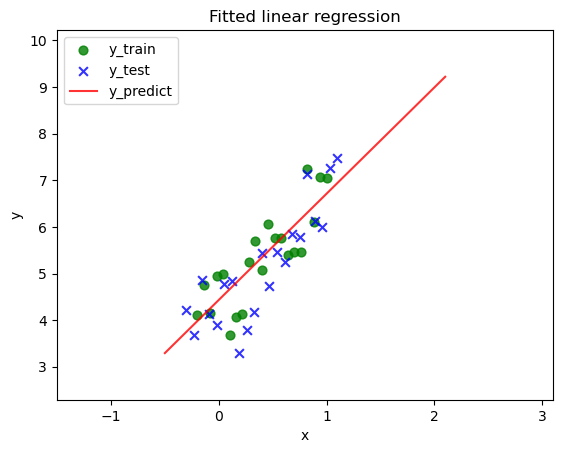

In [81]:
# Ваш код здесь
# Отрисовка
m = 1
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='y_train')
plt.scatter(X_test, y_test, 40, 'b', 'x', alpha=0.8, label='y_test')
plt.plot(X, y_predict, 'r', alpha=0.8, label='y_predict')
plt.xlim(X.min() - m, X.max() + m)
plt.ylim(y_predict.min() - m, y_predict.max() + m)
plt.legend(loc = 'best', prop = {'size': 10})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Найдите значения функционалов ошибки $MSE$, $RMSE$, $R^2$. Сравните их со значениями библиотечных функций `scikit-learn`.

In [82]:
# Ваш код здесь
print('Ошибка на обучающем наборе:')
y_predict_train = lin_reg(X_train, w)
print('MSE = ', MSE(y_train, y_predict_train), ' scikit-learn MSE = ', mean_squared_error(y_train, y_predict_train))
print('RMSE = ', RMSE(y_train, y_predict_train))
print('R2 = ', R2(y_train, y_predict_train), ' scikit-learn R2_score = ', r2_score(y_train, y_predict_train))

print('\nОшибка на тестовом наборе:')
y_predict_test = lin_reg(X_test, w)
print('MSE = ', MSE(y_test, y_predict_test), ' scikit-learn MSE = ', mean_squared_error(y_test, y_predict_test))
print('RMSE = ', RMSE(y_test, y_predict_test))
print('R2 = ', R2(y_test, y_predict_test), ' scikit-learn R2_score = ', r2_score(y_test, y_predict_test))

Ошибка на обучающем наборе:
MSE =  0.2968966332625196  scikit-learn MSE =  0.2968966332625196
RMSE =  0.5448822196241309
R2 =  0.6978349896117897  scikit-learn R2_score =  0.6978349896117897

Ошибка на тестовом наборе:
MSE =  0.4351202004048888  scikit-learn MSE =  0.4351202004048888
RMSE =  0.6596364153114114
R2 =  0.6848801332179663  scikit-learn R2_score =  0.6848801332179663
